In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = [12, 8]

dataset='ExcessiveMethodCalls.csv'
bins=20

df = pd.read_csv('../datasets/' + dataset)

In [91]:
cols = ['egaps_fixed', 'hits', 'energy_before', 'energy_after',
              'time_before', 'time_after', 'total_calls', 'diff_calls']

df = df.drop([df.columns[0]], axis=1)
df = df.iloc[:,0:8]

df.columns = cols

In [92]:
def downcast_dtypes(df):
    df_int = df.select_dtypes(include=['int'])
    df_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[df_int.columns] = df_int

    df_float = df.select_dtypes(include=['float'])
    df_float = df_float.apply(pd.to_numeric, downcast='float')
    df[df_float.columns] = df_float
    
    return df

df = downcast_dtypes(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 8 columns):
egaps_fixed      7125 non-null uint8
hits             7125 non-null uint16
energy_before    7125 non-null float32
energy_after     7125 non-null float32
time_before      7125 non-null float32
time_after       7125 non-null float32
total_calls      7125 non-null uint16
diff_calls       7125 non-null uint8
dtypes: float32(4), uint16(2), uint8(2)
memory usage: 153.2 KB


In [93]:
df = df.fillna(0)
df = df.round(2)
# df = df[df['hits'] != 3151]

In [94]:
df['energy_pct'] = -(100 - df['energy_after'] * 100 / df['energy_before'])
df['feature'] = df['egaps_fixed'].apply(str) + ':' + df['hits'].apply(str)
df['bin'] = pd.cut(df['energy_pct'], bins=bins, precision=1)

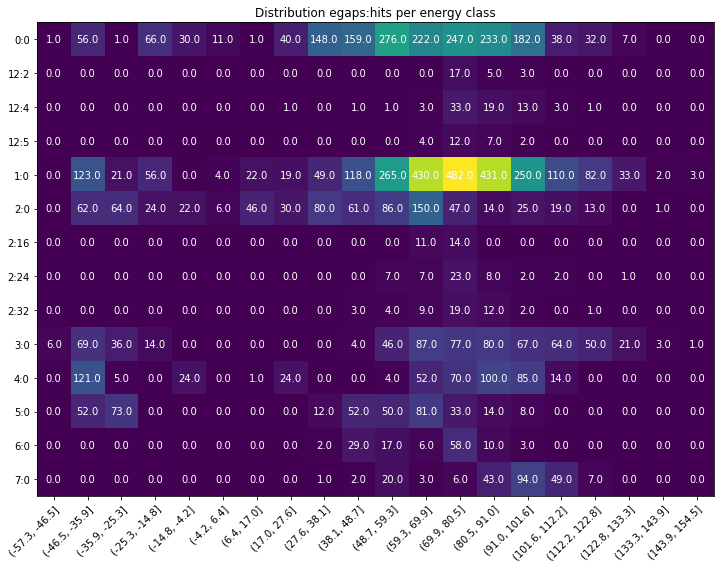

In [98]:
vegetables = list(df['feature'].sort_values().unique())
farmers = list(df['bin'].sort_values().unique())

harvest = np.array(df.groupby(['feature'])['bin'].value_counts().unstack().fillna(0).values)


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title('Distribution egaps:hits per energy class')
fig.tight_layout()
plt.show()